In [1]:
import json
import pandas as pd
import glob
import matplotlib.pyplot as plt
import datetime
import numpy as np

pd.options.display.max_rows = 100

plt.style.use("dark_background")
df = pd.read_csv("all-financials-f500.csv")


In [2]:
del df["Unnamed: 0"]
del df["source"]
import re
p = "\d{4}-\d{2}-\d{2}T\d{2}:\d{2}:\d{2}"
dates = []
tickers = []



for i in df["index"].values:
    date = re.findall(p,i)[0]
    ticker = i.replace(date,"")
    dates.append(datetime.datetime.fromisoformat(date))
    tickers.append(ticker)

df["quarter_date"] = dates
df["ticker"] = tickers

df = df[df["date"] > "2016-01-01"]
# df.to_csv("export-f500-all-semiclean.csv")
df.head()

,ebit,incomeBeforeTax,totalOtherIncomeExpenseNet,sellingGeneralAdministrative,otherOperatingExpenses,totalOperatingExpenses,totalRevenue,minorityInterest,operatingIncome,costOfRevenue,...,netTangibleAssets,additionalPaidInCapital,propertyPlantEquipment,totalCurrentAssets,commonStock,retainedEarnings,inventory,accountsPayable,ticker,quarter_date
26,1.793000e+09,1.746000e+09,-42000000.0,1.493000e+09,0.0,0.000000e+00,7.409000e+09,41000000.0,1.788000e+09,3.678000e+09,...,-1.930000e+08,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,MMM,2016-03-31
27,-5.299000e+09,1.835000e+09,-31000000.0,1.560000e+09,0.0,0.000000e+00,7.662000e+09,-121000000.0,1.866000e+09,3.799000e+09,...,6.100000e+07,4.972000e+09,0.0,0.0,0.0,0.0,0.0,0.0,MMM,2016-06-30
28,5.178000e+09,1.862000e+09,-42000000.0,1.531000e+09,0.0,0.000000e+00,7.709000e+09,120000000.0,1.904000e+09,3.847000e+09,...,1.500000e+08,5.021000e+09,0.0,0.0,0.0,0.0,0.0,0.0,MMM,2016-09-30
29,5.440000e+09,1.610000e+09,-55000000.0,1.527000e+09,0.0,2.299700e+10,7.329000e+09,5000000.0,1.665000e+09,3.716000e+09,...,-1.188000e+09,5.070000e+09,0.0,0.0,0.0,0.0,0.0,0.0,MMM,2016-12-31
30,1.782000e+09,1.737000e+09,-37000000.0,1.571000e+09,0.0,0.000000e+00,7.685000e+09,51000000.0,1.774000e+09,3.869000e+09,...,-5.380000e+08,5.198000e+09,0.0,0.0,0.0,0.0,0.0,0.0,MMM,2017-03-31


In [3]:
for col in df:
    t = df[col].dtype
    if pd.api.types.is_numeric_dtype(t):
        pass
        # df[col] = df[col].fillna(0)

In [4]:
df = df.set_index(["ticker", "quarter_date"]).sort_index()

In [5]:
tickers = sorted(list(set([i[0] for i in df.index])))
quarters = sorted(list(set([i[1] for i in df.index])))

In [6]:
null_df = []
for c in df:
    null_percent = df[c].isna().sum() / df.shape[0]
    null_df.append(
       { "column":c,
        "null_percent": null_percent * 100}
    )
null_df = pd.DataFrame(null_df)

variables = sorted(null_df[null_df.null_percent < 3.00].column.values.tolist())

df = df[variables]
df = df[df.totalAssets > 0]

In [7]:
qids = []

for t in tickers:
    # print(t)
    ticker_quarters = [i for i in df.loc[t].index]
    ticker_quarter_ids = list(range(len(ticker_quarters)))
    qids += ticker_quarter_ids

assert len(qids) == df.shape[0]
df["ticker_quarter_ids"] = qids
df = df.reset_index().set_index(["ticker", "ticker_quarter_ids"])

In [8]:
import random


t = random.choice(tickers)
df.loc[t]


,quarter_date,accountsPayable,capitalExpenditures,cash,commonStock,costOfRevenue,date,depreciation,ebit,goodWill,...,totalCashFromFinancingActivities,totalCashFromOperatingActivities,totalCashflowsFromInvestingActivities,totalCurrentAssets,totalCurrentLiabilities,totalLiab,totalOperatingExpenses,totalOtherIncomeExpenseNet,totalRevenue,totalStockholderEquity
ticker_quarter_ids,,,,,,,,,,,,,,,,,,,,,
0,2016-06-30,5.943000e+09,6.100000e+08,4.925000e+09,0.0,0.000000e+00,2016-06-30,0.000000e+00,-3.783000e+09,0.0,...,-1.237000e+09,2.959000e+09,-9.310000e+08,1.618000e+10,8.652000e+09,0.000000e+00,0.000000e+00,0.0,1.958400e+10,2.057600e+10
1,2016-09-30,5.368000e+09,9.120000e+08,5.949000e+09,0.0,0.000000e+00,2016-09-30,0.000000e+00,6.004000e+09,0.0,...,-5.790000e+08,3.822000e+09,-1.384000e+09,1.687800e+10,8.224000e+09,0.000000e+00,0.000000e+00,0.0,1.964900e+10,2.033900e+10
2,2016-12-31,6.357000e+09,1.278000e+09,4.816000e+09,0.0,0.000000e+00,2016-12-31,1.894000e+09,5.690000e+08,0.0,...,-2.012000e+09,4.820000e+09,-2.006000e+09,1.680000e+10,8.328000e+09,0.000000e+00,6.653800e+10,0.0,2.071200e+10,2.002400e+10
3,2017-03-31,6.037000e+09,2.790000e+08,4.463000e+09,0.0,0.000000e+00,2017-03-31,5.000000e+08,5.540000e+08,0.0,...,-6.520000e+08,9.880000e+08,-7.140000e+08,1.590800e+10,7.899000e+09,0.000000e+00,0.000000e+00,0.0,2.177200e+10,1.982500e+10
4,2017-06-30,5.456000e+09,5.720000e+08,5.207000e+09,0.0,0.000000e+00,2017-06-30,9.990000e+08,-2.453000e+09,0.0,...,-1.328000e+09,2.785000e+09,-1.174000e+09,1.573100e+10,7.683000e+09,0.000000e+00,1.999900e+10,0.0,2.225400e+10,1.992300e+10
5,2017-09-30,6.677000e+09,9.130000e+08,5.176000e+09,0.0,6.416200e+10,2017-09-30,1.496000e+09,5.337000e+09,0.0,...,-1.943000e+09,3.822000e+09,-1.740000e+09,1.744200e+10,9.130000e+09,0.000000e+00,-7.926200e+10,0.0,2.356200e+10,2.037000e+10
6,2017-12-31,8.348000e+09,-3.940000e+08,5.850000e+09,7000000.0,2.332400e+10,2017-12-31,4.900000e+08,8.700000e+08,0.0,...,-3.290000e+08,1.660000e+09,-6.420000e+08,1.931200e+10,1.107100e+10,2.725800e+10,2.405200e+10,-105000000.0,2.492200e+10,2.199100e+10
7,2018-03-31,7.966000e+09,-4.690000e+08,4.658000e+09,7000000.0,2.342800e+10,2018-03-31,4.980000e+08,8.110000e+08,0.0,...,-5.730000e+08,1.380000e+08,-7.520000e+08,1.826000e+10,1.075200e+10,2.645100e+10,2.416400e+10,-80000000.0,2.497500e+10,2.187700e+10
8,2018-06-30,8.963000e+09,-4.940000e+08,4.451000e+09,7000000.0,2.750000e+10,2018-06-30,5.230000e+08,1.264000e+09,0.0,...,-8.290000e+08,2.059000e+09,-1.380000e+09,1.894800e+10,1.134100e+10,2.787400e+10,2.828100e+10,-140000000.0,2.954500e+10,2.176900e+10


In [9]:
X = df.reset_index()
y = []

for i, row in X.iterrows():
    try:
        _id = row["ticker_quarter_ids"]
        ticker = row["ticker"]
        qd = row["quarter_date"]
        _id1 = _id+1
        y_row = X.query(f"ticker == '{ticker}' & ticker_quarter_ids == {_id1}")
        gp = y_row["grossProfit"].iloc[0]
        if gp > row["grossProfit"]:
            y.append(1)
        else:
            y.append(0)
    except Exception as e:
        # print(e)
        y.append(None)

X["grossProfitIncreases"] = y
X = X.set_index(["ticker", "quarter_date", "ticker_quarter_ids", "date", "index"])
X_normalized = X.copy()

In [10]:
for col in [i for i in X_normalized.columns if i !="grossProfitIncreases"]:
    X_normalized[col] = (X_normalized[col] - X_normalized[col].mean()) / X_normalized[col].std()

In [11]:
X_normalized = X_normalized.dropna()
y = X_normalized["grossProfitIncreases"].copy().values
del X_normalized["grossProfitIncreases"]

In [12]:
X_normalized.head().values

array([[-0.11605399, -0.00774611, -0.08273597, -0.1881196 , -0.25636557,
        -0.30115243, -0.02217613, -0.29522185, -0.40783053, -0.21761547,
        -0.1489816 , -0.26724658, -0.04391976, -0.29255994, -0.0220906 ,
        -0.02356876, -0.35494501, -0.1218947 , -0.42938172, -0.20339076,
        -0.2068147 , -0.26119867,  0.0052828 , -0.29185372,  0.20210605,
        -0.16380056, -0.14156255, -0.22188974, -0.08079003,  0.12194933,
        -0.36468063, -0.31684144],
       [-0.11559685,  0.01416454, -0.0792853 , -0.1881196 , -0.25464503,
        -0.30115243, -0.04774262, -0.29835072, -0.40783053, -0.20760638,
        -0.16386022, -0.27281136, -0.04567501, -0.29264753, -0.04555043,
        -0.04701979, -0.34563838, -0.12012558, -0.42863653, -0.19276634,
        -0.21090494, -0.2607832 , -0.01442623, -0.2388481 ,  0.19793194,
        -0.16318387, -0.1414077 , -0.22232047, -0.08079003,  0.12194933,
        -0.36248719, -0.31057364],
       [-0.11564145,  0.06163761, -0.07410929, -0.1881

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_tr, X_te, Y_tr, Y_te = train_test_split(X_normalized, y)

clf = RandomForestClassifier(random_state=0).fit(X_tr, Y_tr)
clf.score(X_te, Y_te)

0.6864077669902913

In [40]:
fi = pd.DataFrame([{"feature":c, "importance":i} for c,i in zip(X_tr.columns, clf.feature_importances_)]).set_index("feature")
fi.sort_values(by="importance")

,importance
feature,
depreciation,0.014840
commonStock,0.016770
longTermDebt,0.020249
intangibleAssets,0.021313
totalLiab,0.022387
goodWill,0.022937
totalOtherIncomeExpenseNet,0.023041
incomeBeforeTax,0.023811
accountsPayable,0.024759


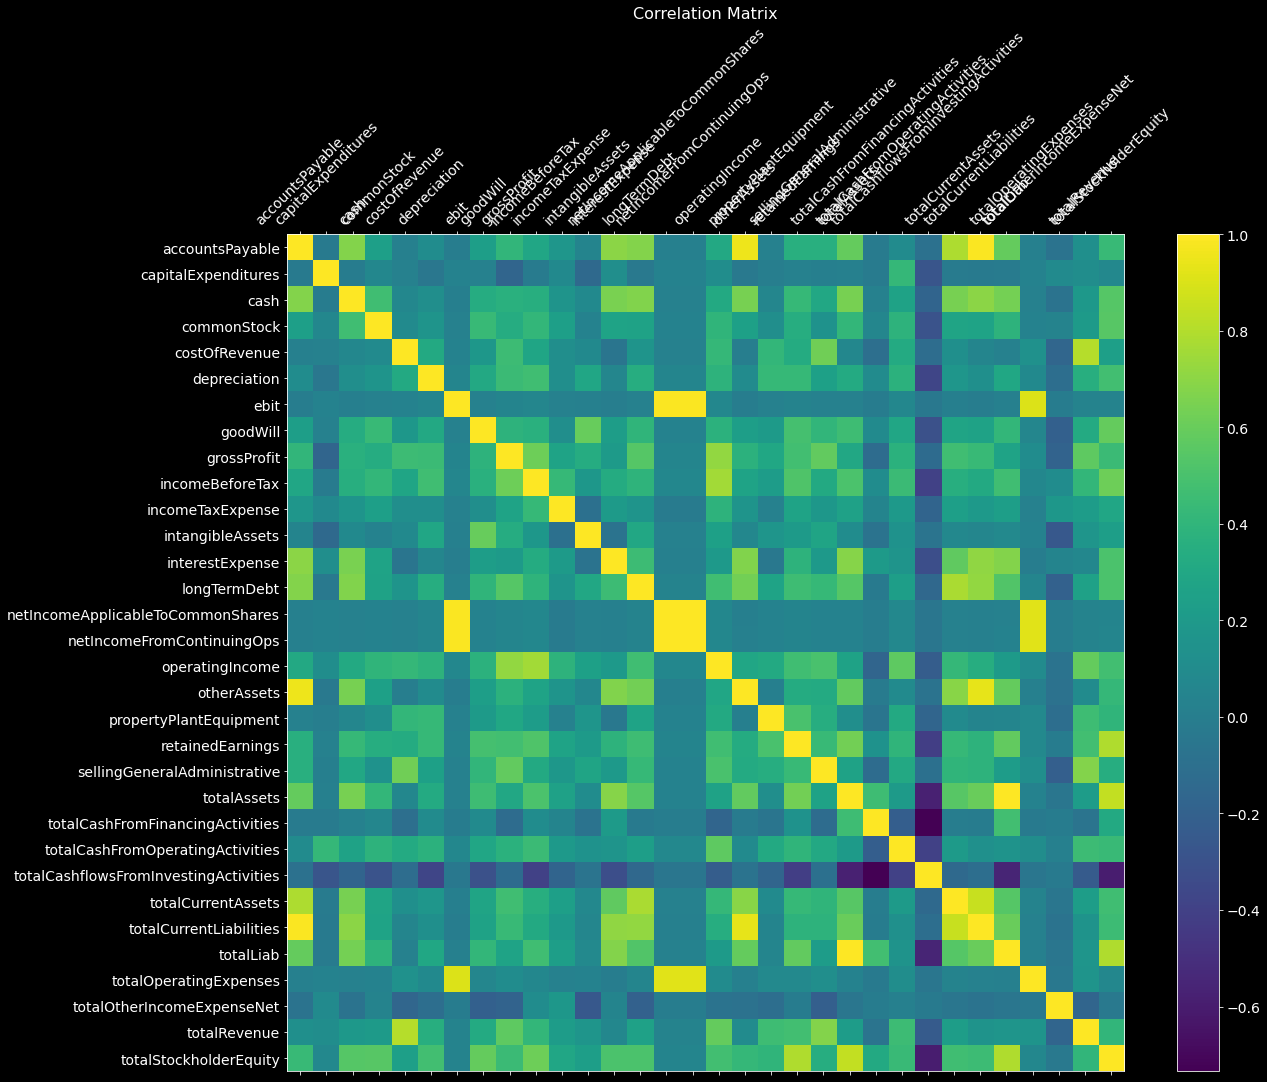

In [24]:
f = plt.figure(figsize=(19, 15))
plt.matshow(X_normalized.corr(), fignum=f.number)
plt.xticks(range(X_normalized.shape[1]), X_normalized.columns, fontsize=14, rotation=45)
plt.yticks(range(X_normalized.shape[1]), X_normalized.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

<BarContainer object of 4120 artists>

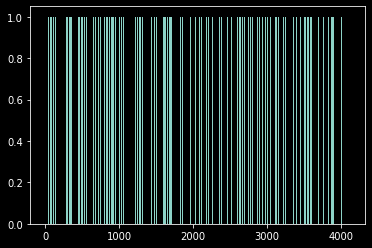

In [43]:
plt.bar(range(len(y)), y)